## Linear 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data=load_breast_cancer()
X=data.data
y=data.target

In [2]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 455
Test size: 114


In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_linear=SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear=svm_linear.predict(X_test_scaled)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193


## Non-Linear

In [6]:
svm_rbf=SVC(kernel="linear", random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf=svm_rbf.predict(X_test_scaled)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.956140350877193


In [7]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=data.target_names))

Confusion Matrix:
[[41  2]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



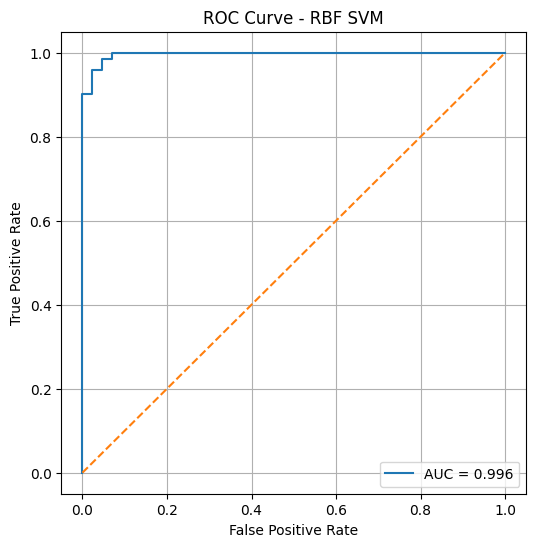

AUC Score: 0.9963969865705863


In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_rbf = svm_rbf.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_prob_rbf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RBF SVM")
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", roc_auc)